In [1]:
import matplotlib.pyplot as plt

from fns import *

[667, 713, 851, 943, 989, 1081, 1219, 1357, 1403, 1541, 1633, 1679, 1817, 1909, 2047, 2231, 899, 1073, 1189, 1247, 1363, 1537, 1711, 1769, 1943, 2059, 2117, 2291, 2407, 2581, 2813, 1147, 1271, 1333, 1457, 1643, 1829, 1891, 2077, 2201, 2263, 2449, 2573, 2759, 3007, 1517, 1591, 1739, 1961, 2183, 2257, 2479, 2627, 2701, 2923, 3071, 3293, 3589, 1763, 1927, 2173, 2419, 2501, 2747, 2911, 2993, 3239, 3403, 3649, 3977, 2021, 2279, 2537, 2623, 2881, 3053, 3139, 3397, 3569, 3827, 4171, 2491, 2773, 2867, 3149, 3337, 3431, 3713, 3901, 4183, 4559, 3127, 3233, 3551, 3763, 3869, 4187, 4399, 4717, 5141, 3599, 3953, 4189, 4307, 4661, 4897, 5251, 5723, 4087, 4331, 4453, 4819, 5063, 5429, 5917, 4757, 4891, 5293, 5561, 5963, 6499, 5183, 5609, 5893, 6319, 6887, 5767, 6059, 6497, 7081, 6557, 7031, 7663, 7387, 8051, 8633]
2
2
1
3
2
0
4
3
0
3
1
3
3
2
3
4
4
0
2
6
5
0
8
0
3
5
4
2
4
4
3
2
4
2
0
3
2
5
4
3
6
3
4
6
4
2
14
5
2
6
3
4
6
4
2
4
3
3
4
3
3
2
4
2
6
2
4
5
0
3
2
4
2
4
3
3
5
3
0
5
3
2
4
2
3
2
3
0
2
18
7
14
2


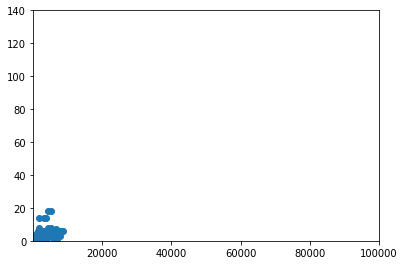

In [2]:
l=[]
for i in range(20,100):
    if is_prime(i):
        l.append(i)
f=[]
for i in range(len(l)):
    for j in range(i+1,len(l)):
        if i!=j:
            f.append(l[i]* l[j])
print(f)

x=[]
y=[]
for i in range(len(f)):
    
    num_variables=num_variables_final(f[i])
    print(num_variables)
    x.append(f[i])
    y.append(num_variables)
    
a=plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([2,100000])
axes.set_ylim([0,140])
axes.scatter(x,y)
plt.show()       

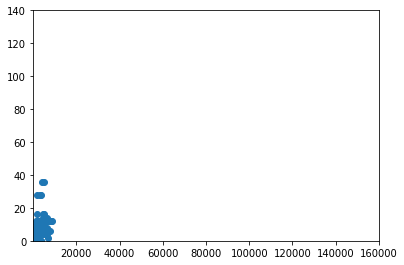

In [3]:
z=[]
for i in range (len(y)):
    z.append(2*y[i])
a=plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([2,160000])
axes.set_ylim([0,140])
axes.scatter(x,z)
plt.show()      